Diego Armando Parraga Ortuste
Dataset:https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [1]:
#importamos las librerias
import torch
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import random


In [45]:
def cargar_dataset_train(ruta_dataset, tamaño_imagen=(150, 150)):
    # Reiniciar variables
    dataset = []
    etiquetas_mapping = {}

    # Obtener clases del nuevo dataset y ordenarlas
    clases = sorted(os.listdir(ruta_dataset))

    # Mapeo de etiquetas a valores numéricos
    etiquetas_mapping = {clase: idx for idx, clase in enumerate(clases)}

    for clase in clases:
        #print(f"Procesando clase testing: {clase} ({etiquetas_mapping[clase]})")
        ruta_clase = os.path.join(ruta_dataset, clase)
        etiqueta_num = etiquetas_mapping[clase]  # Obtener el valor numérico de la etiqueta directamente
        with os.scandir(ruta_clase) as entries:
            for idx, entry in enumerate(entries, start=1):
                if entry.is_file():
                    imagen_ruta = os.path.join(ruta_clase, entry.name)
                    # Abrir imagen como objeto PIL
                    imagen = Image.open(imagen_ruta).convert('RGB')
                    # Normalizar la imagen
                    imagen = np.array(imagen) / 255.0
                    # Convertir la imagen normalizada a objeto PIL
                    imagen_pil = Image.fromarray((imagen * 255).astype(np.uint8))
                    # Redimensionar imagen
                    imagen_resized = imagen_pil.resize(tamaño_imagen)
                    dataset.append((imagen_resized, etiqueta_num))  # Tupla con imagen y etiqueta numérica

    random.shuffle(dataset)
    return dataset



In [46]:
def cargar_dataset_test(ruta_dataset, tamaño_imagen=(150, 150)):
    # Reiniciar variables
    dataset = []
    etiquetas_mapping = {}

    # Obtener clases del nuevo dataset y ordenarlas
    clases = sorted(os.listdir(ruta_dataset))

    # Mapeo de etiquetas a valores numéricos
    etiquetas_mapping = {clase: idx for idx, clase in enumerate(clases)}

    for clase in clases:
        #print(f"Procesando clase testing: {clase} ({etiquetas_mapping[clase]})")
        ruta_clase = os.path.join(ruta_dataset, clase)
        etiqueta_num = etiquetas_mapping[clase]  # Obtener el valor numérico de la etiqueta directamente
        with os.scandir(ruta_clase) as entries:
            for idx, entry in enumerate(entries, start=1):
                if entry.is_file():
                    imagen_ruta = os.path.join(ruta_clase, entry.name)
                    # Abrir imagen como objeto PIL
                    imagen = Image.open(imagen_ruta).convert('RGB')
                    # Normalizar la imagen
                    imagen = np.array(imagen) / 255.0
                    # Convertir la imagen normalizada a objeto PIL
                    imagen_pil = Image.fromarray((imagen * 255).astype(np.uint8))
                    # Redimensionar imagen
                    imagen_resized = imagen_pil.resize(tamaño_imagen)
                    dataset.append((imagen_resized, etiqueta_num))  # Tupla con imagen y etiqueta numérica

    random.shuffle(dataset)
    return dataset



In [64]:
trainset = cargar_dataset_train('imagenes\\seg_train\\seg_train')
testset = cargar_dataset_test('imagenes\\seg_test\\seg_test')



print("Número de ejemplos en el conjunto de entrenamiento:", len(trainset))
print("Número de ejemplos en el conjunto de prueba:", len(testset))

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'imagenes\\seg_test\\seg_test'

In [ ]:
classes = ('buildings', 'forest', 'glacier', 'mountain', 'sea', 'street')

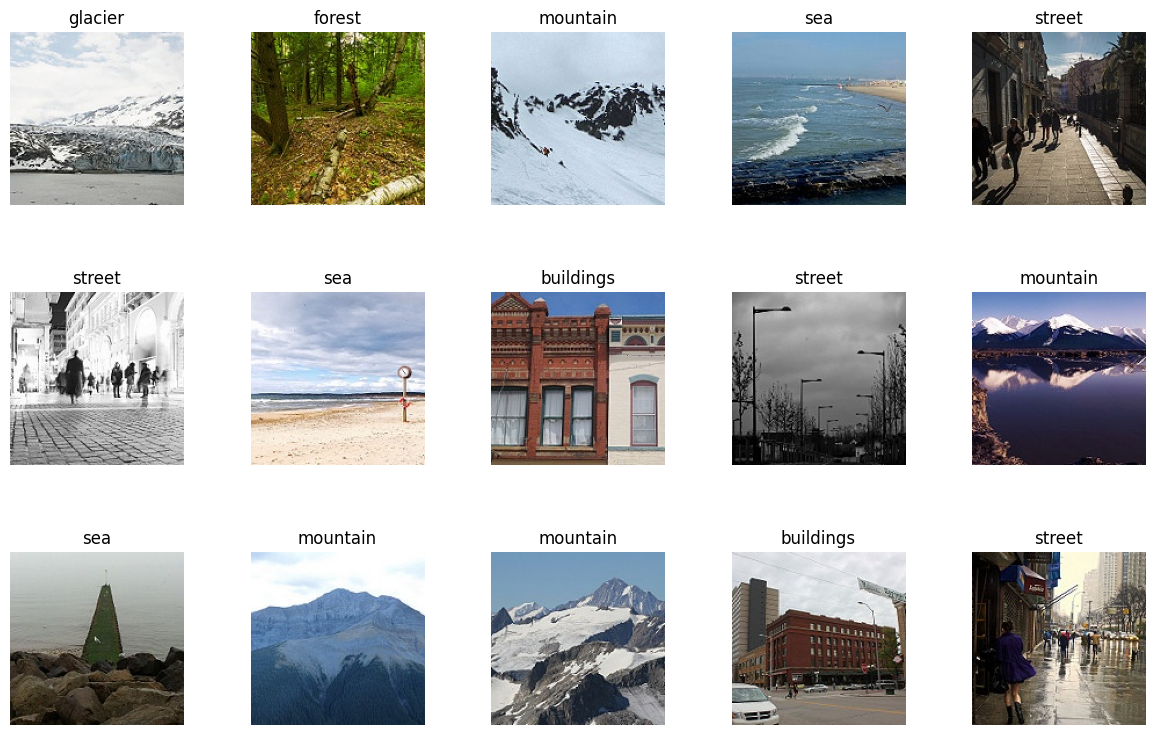

In [ ]:
import random
import matplotlib.pyplot as plt

r, c = 3, 5
plt.figure(figsize=(c*3, r*3))
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(trainset)-1)
        img, label = trainset[ix]
        #print(label)
        #clase_index = classes.index(clase)
        plt.imshow(img)
        plt.axis('off')
        plt.title(classes[label])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# convertimos imágenes a arrays de numpy
train_images = np.array([np.array(img) for img, label in trainset])
test_images = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
test_labels = np.array([label for img, label in testset])

In [ ]:
# ver número de imágenes, resolución y número de canales
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((14034, 150, 150, 3), (3000, 150, 150, 3), (14034,), (3000,))

# **RECETA DE ENTRENAMIENTO**

#Verificacion de datos

In [ ]:
# tipo de datos
train_images.dtype, train_labels.dtype

(dtype('uint8'), dtype('int32'))

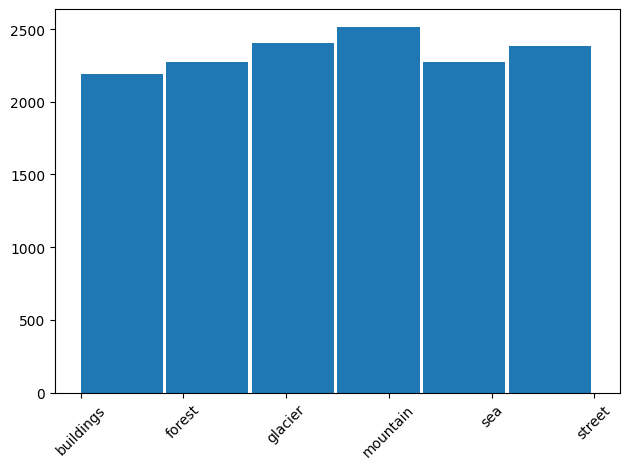

In [ ]:
# Visualización del histograma
plt.hist(train_labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), classes, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
(unique, counts)

(array([0, 1, 2, 3, 4, 5]),
 array([2191, 2271, 2404, 2512, 2274, 2382], dtype=int64))

#Validando MLP

In [ ]:
def build_model(D_in=150*150*3, H=100, D_out=6):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

In [ ]:
#Enviamos un batch de 64 y la salida deberia ser un vector de 15 valores por cada imagen del batch
model = build_model()
test_input = torch.randn((64, 150*150*3))
test_output = model(test_input)
test_output.shape

torch.Size([64, 6])

In [ ]:
train_images = np.array([np.array(img) for img, label in trainset])
X_test = np.array([np.array(img) for img, label in testset])

train_labels = np.array([label for img, label in trainset])
y_test = np.array([label for img, label in testset])

X_train, X_val, X_subset = train_images[:8000], train_images[8000:], train_images[:5000]
y_train, y_val, y_subset = train_labels[:8000], train_labels[8000:], train_labels[:5000]

X_train.shape, X_val.shape, X_test.shape, X_subset.shape

((8000, 150, 150, 3),
 (6034, 150, 150, 3),
 (3000, 150, 150, 3),
 (5000, 150, 150, 3))

Una vez nos hemos asegurado que las dimensiones de nuestra red están bien, el siguiente paso es asegurarnos de que es capaz de aprenderse de memoria una sola muestra del dataset.

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().view(-1, 150*150*3)
        self.Y = torch.from_numpy(Y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [ ]:
# fit de una imagen del dataset
dataset = Dataset(X_subset[3:4], y_subset[3:4])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

len(dataset)

1

Podemos ver que logramos el fit de una sola imagen sin problema

In [ ]:
epochs = 5
criterion = torch.nn.CrossEntropyLoss()
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for e in range(1, epochs+1):
    for x_b, y_b in dataloader:
        #print(y_b)
        y_pred = model(x_b)
        loss = criterion(y_pred, y_b)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Epoch {e}/{epochs} loss {loss.item():.5f} y {y_b.item()} y_pred {torch.argmax(y_pred, axis=1).item()}")

Epoch 1/5 loss 2.77202 y 0 y_pred 3
Epoch 2/5 loss 0.00000 y 0 y_pred 0
Epoch 3/5 loss 0.00000 y 0 y_pred 0
Epoch 4/5 loss 0.00000 y 0 y_pred 0
Epoch 5/5 loss 0.00000 y 0 y_pred 0


Ahora siguiendo la misma logica del anterior entrenamiento, el modelo deberia ser capaz de aprenderse de memoria un solo batch de imagenes

In [ ]:
# fit de un batch

dataset = Dataset(X_subset[:64], y_subset[:64])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

len(dataset)

64

In [ ]:
epochs = 200
criterion = torch.nn.CrossEntropyLoss()
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for e in range(1, epochs+1):
    for x_b, y_b in dataloader:
        y_pred = model(x_b)
        loss = criterion(y_pred, y_b)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = (y_b == torch.argmax(y_pred, axis=1)).sum().item()
        #print(acc)
        if not e % 10:
            print(f"Epoch {e}/{epochs} loss {loss.item():.5f} acc {acc}/{y_b.shape[0]}")

Epoch 10/200 loss 3.96309 acc 12/64
Epoch 20/200 loss 1.34569 acc 30/64
Epoch 30/200 loss 0.78409 acc 49/64
Epoch 40/200 loss 0.51629 acc 55/64
Epoch 50/200 loss 0.32527 acc 62/64
Epoch 60/200 loss 0.19043 acc 64/64
Epoch 70/200 loss 0.11692 acc 64/64
Epoch 80/200 loss 0.07378 acc 64/64
Epoch 90/200 loss 0.04818 acc 64/64
Epoch 100/200 loss 0.03301 acc 64/64
Epoch 110/200 loss 0.02397 acc 64/64
Epoch 120/200 loss 0.01820 acc 64/64
Epoch 130/200 loss 0.01431 acc 64/64
Epoch 140/200 loss 0.01161 acc 64/64
Epoch 150/200 loss 0.00964 acc 64/64
Epoch 160/200 loss 0.00815 acc 64/64
Epoch 170/200 loss 0.00695 acc 64/64
Epoch 180/200 loss 0.00593 acc 64/64
Epoch 190/200 loss 0.00511 acc 64/64
Epoch 200/200 loss 0.00432 acc 64/64


#Entrenando sub-conjunto de datos

In [ ]:
dataset = {
    'train': Dataset(X_subset, y_subset),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(5000, 6034)

In [ ]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def fit(model, dataloader, optimizer, scheduler=None, epochs=None, log_each=1, weight_decay=0, early_stopping=0, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.numpy(), y_probas.detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.numpy(), y_probas.numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        if scheduler:
            scheduler.step()
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each and verbose:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

In [ ]:
# Ver que learning rate es adecuado
lrs = [0.0001, 0.0003, 0.0005]
hists = []
for lr in lrs:
    print(f"Probando lr {lr}")
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=10, verbose=0)
    hists.append(hist)


Probando lr 0.0001
Probando lr 0.0003
Probando lr 0.0005


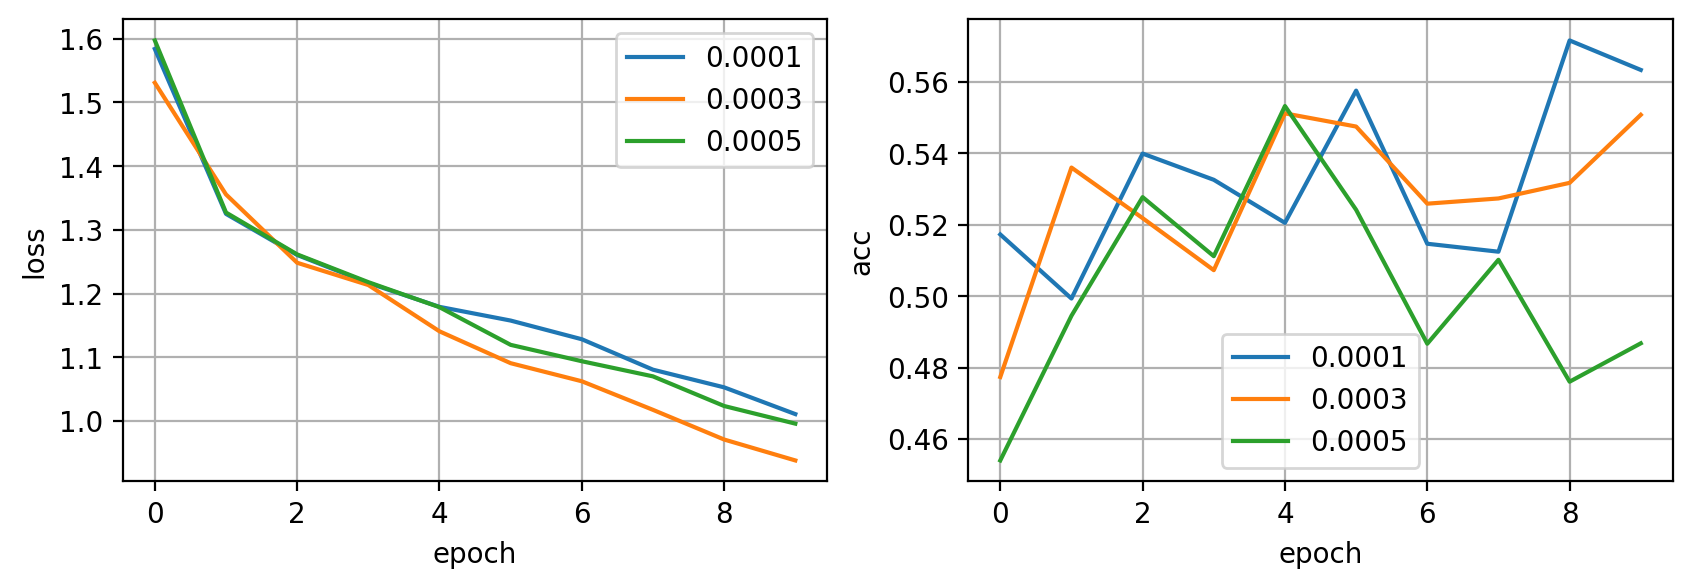

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
for i in range(len(lrs)):
    ax.plot(hists[i]['loss'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
for i in range(len(lrs)):
    ax.plot(hists[i]['val_acc'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

Repetimos lo mismo pero ahora con todos los datos

In [ ]:
dataset = {
    'train': Dataset(X_train, y_train),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(8000, 6034)

In [ ]:
hists = []
for lr in lrs:
    print(f"Probando lr {lr}")
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=10, verbose=0)
    hists.append(hist)

Probando lr 0.0001
Probando lr 0.0003
Probando lr 0.0005


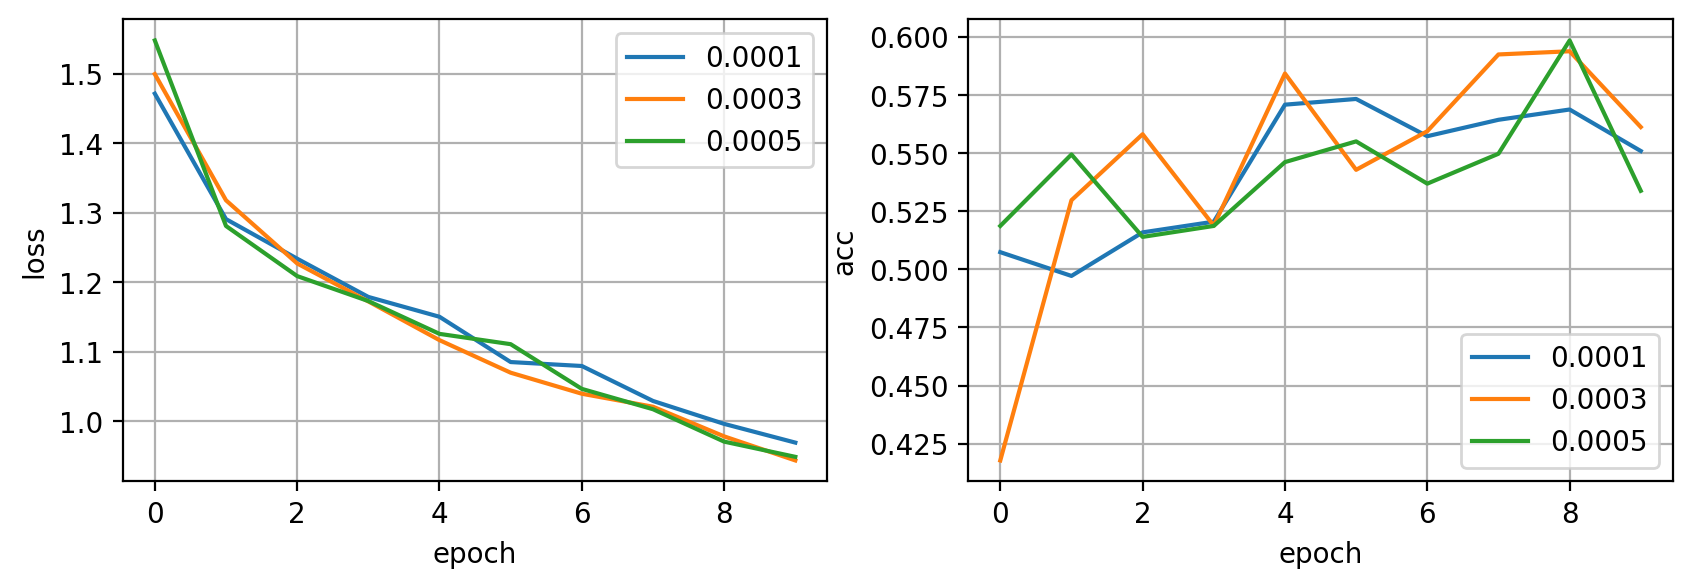

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
for i in range(len(lrs)):
    ax.plot(hists[i]['loss'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
for i in range(len(lrs)):
    ax.plot(hists[i]['val_acc'], label=lrs[i])
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

#Tuneado de hyperparámetros

In [ ]:
bss = [16, 32, 64, 128, 256]
lrs = [0.01, 0.003, 0.006, 0.00004, 0.001]
n = 5
hists = []
for i in range(n):
    lr = random.choice(lrs)
    bs = random.choice(bss)
    print(f"Test {i+1} lr {lr} bs {bs}")
    dataloader = {
        'train': torch.utils.data.DataLoader(dataset['train'], batch_size=bs, shuffle=True),
        'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
    }
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=20, verbose=0)
    hists.append({'hist': hist, 'lr': lr, 'bs': bs})

Test 1 lr 0.003 bs 128
Test 2 lr 0.001 bs 32
Test 3 lr 4e-05 bs 256
Test 4 lr 0.001 bs 32
Test 5 lr 0.006 bs 32


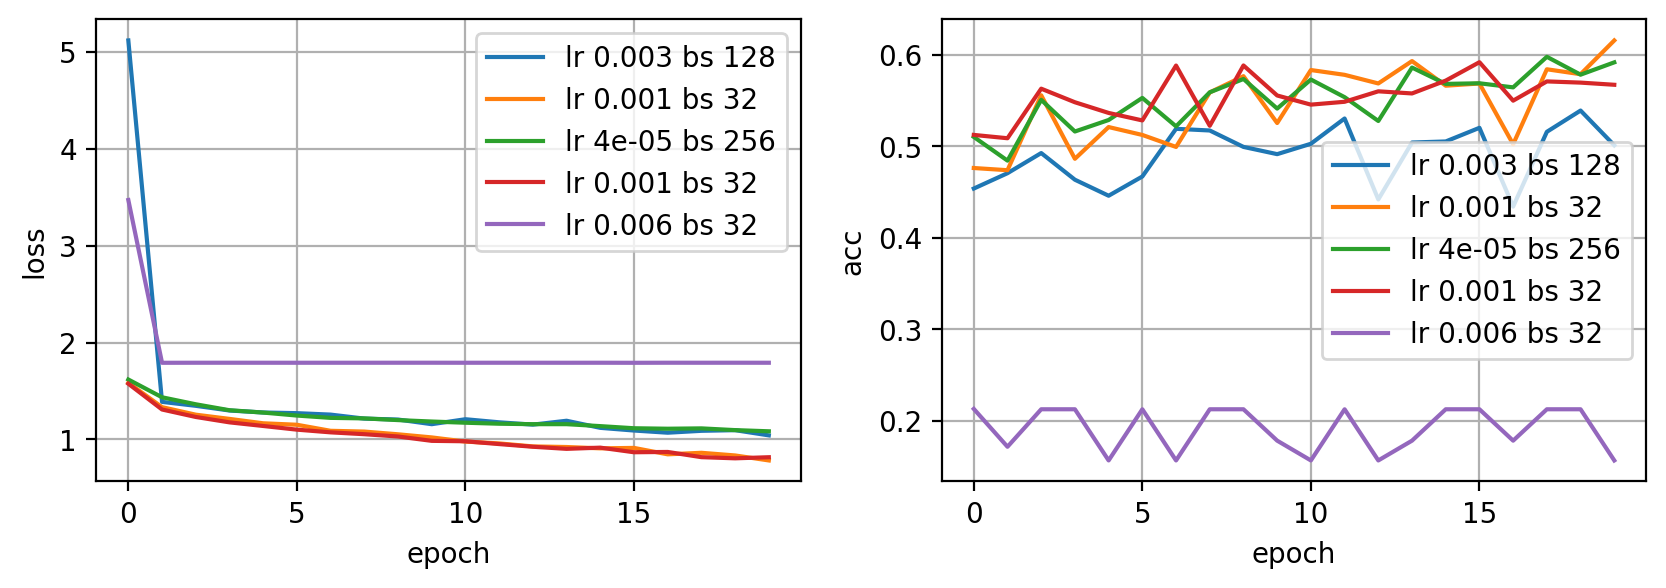

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
for i in range(len(hists)):
    ax.plot(hists[i]['hist']['loss'], label=f'lr {hists[i]["lr"]} bs {hists[i]["bs"]}')
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
for i in range(len(hists)):
    ax.plot(hists[i]['hist']['val_acc'], label=f'lr {hists[i]["lr"]} bs {hists[i]["bs"]}')
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# **APLICANDO LOS CONCEPTOS DE REGULARIZACION**

# MLP sin ninguna regularizacion

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().view(-1, 150*150*3)
        self.Y = torch.from_numpy(Y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

dataset = {
    'train': Dataset(X_subset, y_subset),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(5000, 6034)

In [ ]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def build_model(D_in=150*150*3, H=100, D_out=6):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

def fit(model, dataloader, epochs=200, log_each=10, weight_decay=0):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=weight_decay)
    l, acc = [], []
    val_l, val_acc = [], []
    for e in range(1, epochs+1):
        _l, _acc = [], []
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f}")
    return {'epoch': list(range(1, epochs+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}

In [ ]:
model = build_model()
hist = fit(model, dataloader)

Epoch 10/200 loss 1.80039 acc 0.16600 val_loss 1.81336 val_acc 0.15966
Epoch 20/200 loss 1.80570 acc 0.16919 val_loss 1.81397 val_acc 0.16892
Epoch 30/200 loss 1.79685 acc 0.17118 val_loss 1.81127 val_acc 0.15966
Epoch 40/200 loss 1.79863 acc 0.16998 val_loss 1.79778 val_acc 0.15052
Epoch 50/200 loss 1.79962 acc 0.15466 val_loss 1.79179 val_acc 0.20236
Epoch 60/200 loss 1.79804 acc 0.16063 val_loss 1.79447 val_acc 0.20236
Epoch 70/200 loss 1.79791 acc 0.15685 val_loss 1.79222 val_acc 0.15966
Epoch 80/200 loss 1.79713 acc 0.16162 val_loss 1.79157 val_acc 0.20236
Epoch 90/200 loss 1.79628 acc 0.16979 val_loss 1.78711 val_acc 0.20236
Epoch 100/200 loss 1.79671 acc 0.16103 val_loss 1.79555 val_acc 0.20236
Epoch 110/200 loss 1.79633 acc 0.16859 val_loss 1.79503 val_acc 0.17770
Epoch 120/200 loss 1.79494 acc 0.16561 val_loss 1.79737 val_acc 0.17770
Epoch 130/200 loss 1.79699 acc 0.16063 val_loss 1.78749 val_acc 0.20236
Epoch 140/200 loss 1.79572 acc 0.15983 val_loss 1.78841 val_acc 0.20236
E

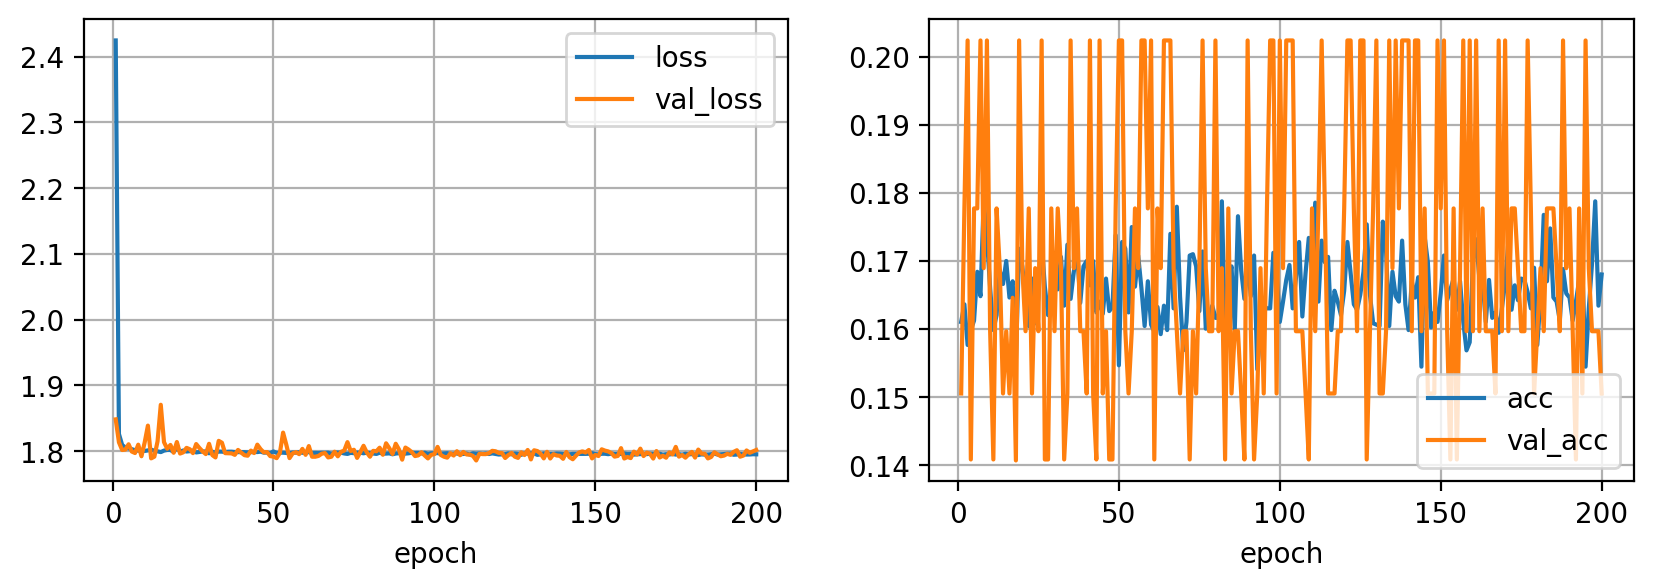

In [ ]:
import pandas as pd

fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# MLP aplicando L2 y Early_stopping

In [ ]:
def fit(model, dataloader, epochs=200, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=weight_decay)
    l, acc = [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}

In [ ]:
model = build_model()
hist = fit(model, dataloader, weight_decay=0.01, early_stopping=20)

Mejor modelo guardado con acc 0.15966 en epoch 1
Mejor modelo guardado con acc 0.20236 en epoch 2
Epoch 10/200 loss 1.81883 acc 0.16063 val_loss 1.81140 val_acc 0.17770
Epoch 20/200 loss 1.81682 acc 0.16819 val_loss 1.82888 val_acc 0.15966
Entrenamiento detenido en epoch 22 por no mejorar en 20 epochs seguidas


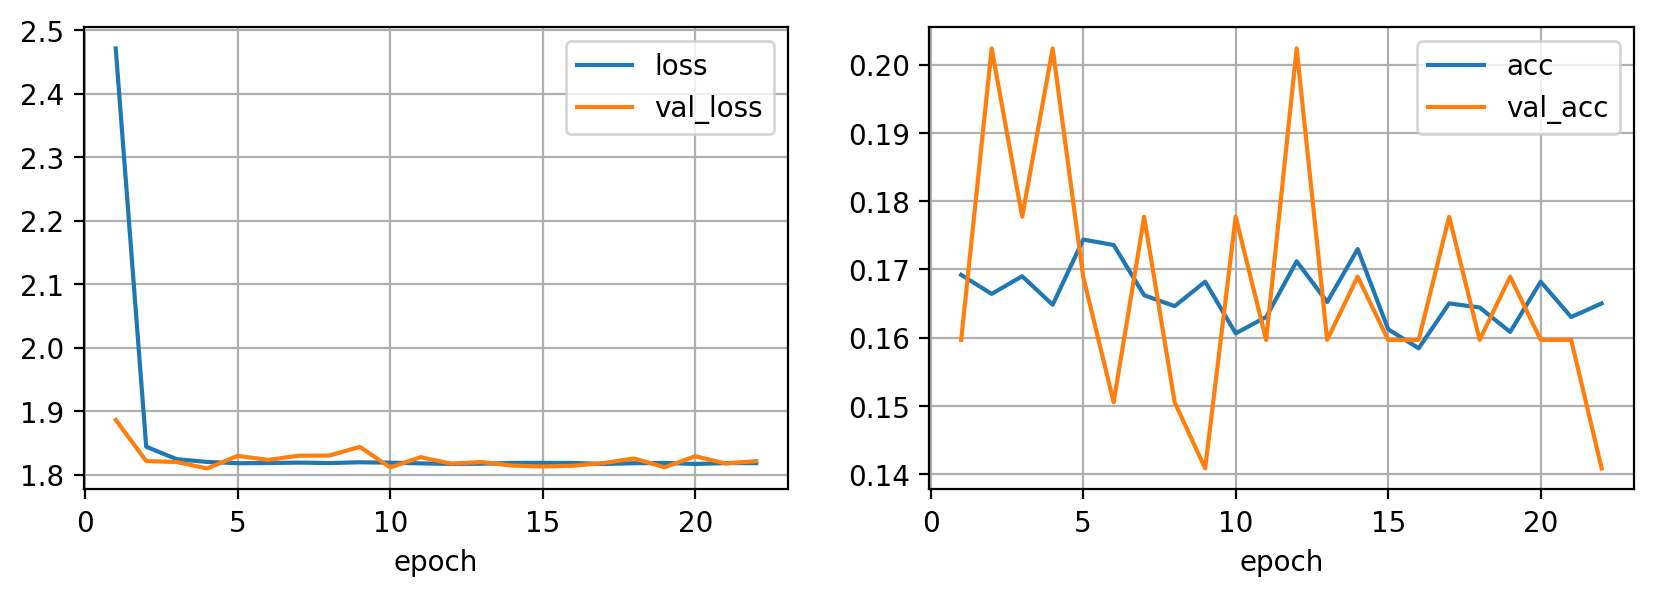

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# Añadiendole Dropout

In [ ]:
def build_model(D_in=150*150*3, H=100, D_out=6, p=0):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, D_out)
    )

In [ ]:
model = build_model(p=0.3)
hist = fit(model, dataloader)

Mejor modelo guardado con acc 0.15966 en epoch 1
Mejor modelo guardado con acc 0.20236 en epoch 2
Epoch 10/200 loss 1.80436 acc 0.16322 val_loss 1.81107 val_acc 0.17770
Epoch 20/200 loss 1.80342 acc 0.16162 val_loss 1.79934 val_acc 0.15052
Epoch 30/200 loss 1.79956 acc 0.17396 val_loss 1.80937 val_acc 0.15052
Epoch 40/200 loss 1.79927 acc 0.16779 val_loss 1.79023 val_acc 0.15966
Epoch 50/200 loss 1.79894 acc 0.16919 val_loss 1.79143 val_acc 0.20236
Epoch 60/200 loss 1.79843 acc 0.16202 val_loss 1.79268 val_acc 0.15052
Epoch 70/200 loss 1.79865 acc 0.16421 val_loss 1.79577 val_acc 0.15052
Epoch 80/200 loss 1.79737 acc 0.16660 val_loss 1.81239 val_acc 0.17770
Epoch 90/200 loss 1.79684 acc 0.16501 val_loss 1.80033 val_acc 0.15052
Epoch 100/200 loss 1.79708 acc 0.16680 val_loss 1.79584 val_acc 0.20236
Epoch 110/200 loss 1.79733 acc 0.15943 val_loss 1.79614 val_acc 0.15966
Epoch 120/200 loss 1.79667 acc 0.16123 val_loss 1.78787 val_acc 0.20236
Epoch 130/200 loss 1.79676 acc 0.16063 val_loss

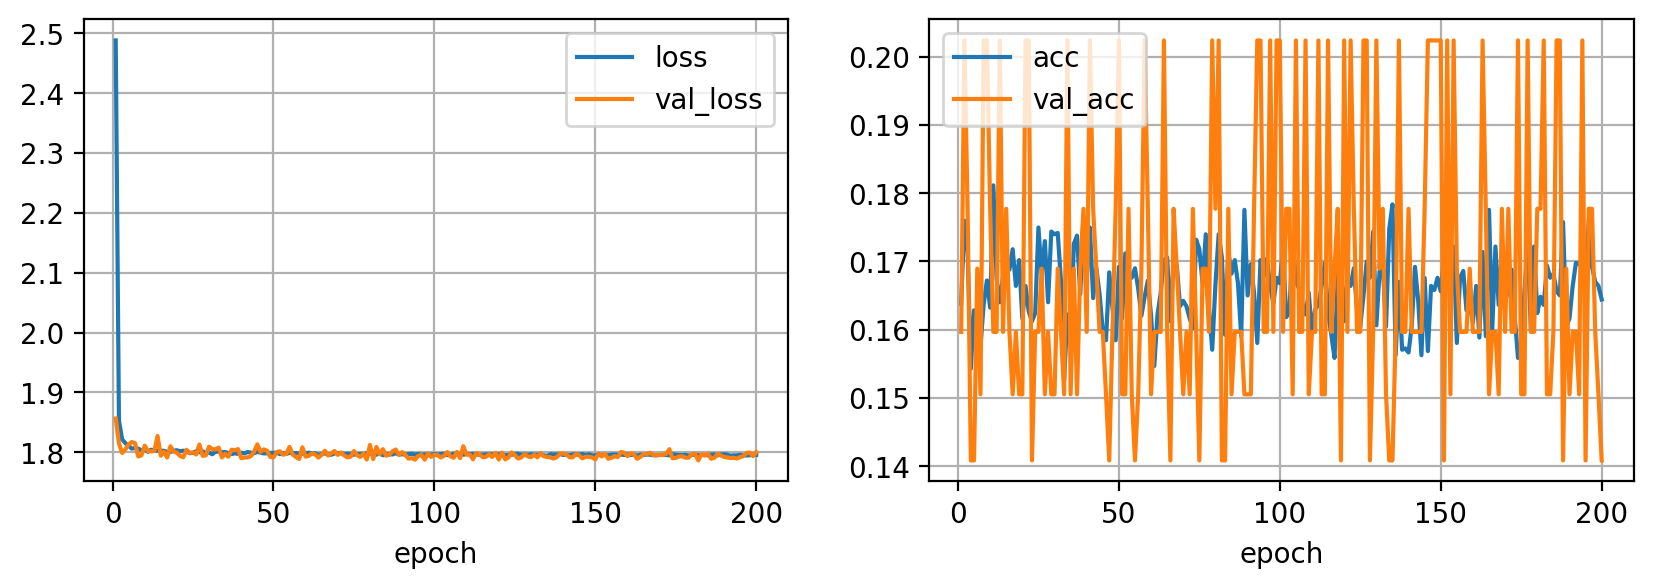

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# Usando todos los datos

In [ ]:
dataset = {
    'train': Dataset(X_train, y_train),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(8000, 6034)

In [ ]:
model = build_model()
hist = fit(model, dataloader, early_stopping=10)

Mejor modelo guardado con acc 0.20236 en epoch 1
Epoch 10/200 loss 1.79840 acc 0.17062 val_loss 1.79827 val_acc 0.14083
Entrenamiento detenido en epoch 11 por no mejorar en 10 epochs seguidas


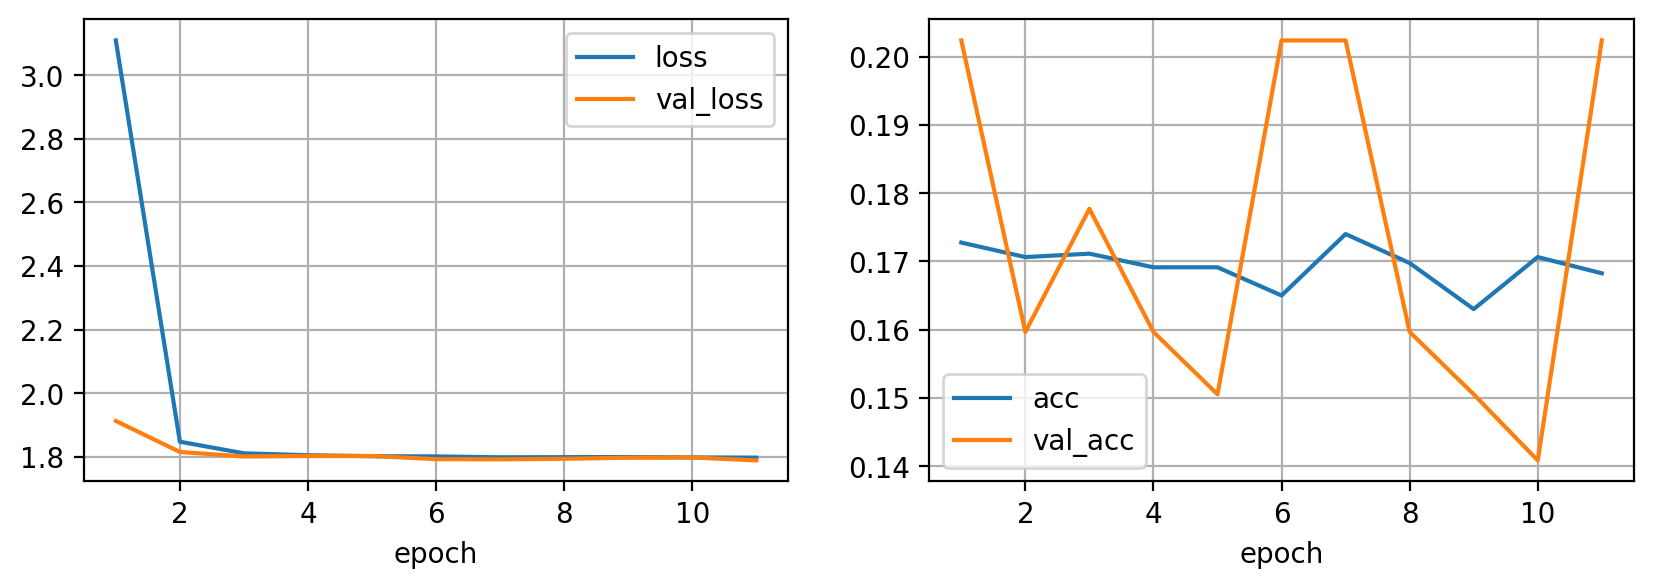

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# Usando Data_Augmentation


In [ ]:
from albumentations import Compose, RandomCrop, Resize, HorizontalFlip, ToGray, RGBShift, OneOf

trans = Compose([
    RandomCrop(24,24),
    Resize(150, 150),
    HorizontalFlip(),
    OneOf([
        ToGray(p=0.2),
        RGBShift(p=0.3)
    ])
])

class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, trans=None):
        self.X = X
        self.Y = Y
        self.trans = trans
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        img = self.X[ix]
        if self.trans:
            img = trans(image=img)["image"]
        img = torch.from_numpy(img / 255.).float().view(-1)
        label = torch.tensor(self.Y[ix]).long()
        return img, label

dataset = {
    'train': Dataset(X_train, y_train, trans=trans),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(8000, 6034)

In [ ]:
model = build_model()
hist = fit(model, dataloader, early_stopping=20)

Mejor modelo guardado con acc 0.20236 en epoch 1
Epoch 10/200 loss 1.79714 acc 0.17200 val_loss 1.79039 val_acc 0.16892
Epoch 20/200 loss 1.79706 acc 0.17175 val_loss 1.79143 val_acc 0.17770
Entrenamiento detenido en epoch 21 por no mejorar en 20 epochs seguidas


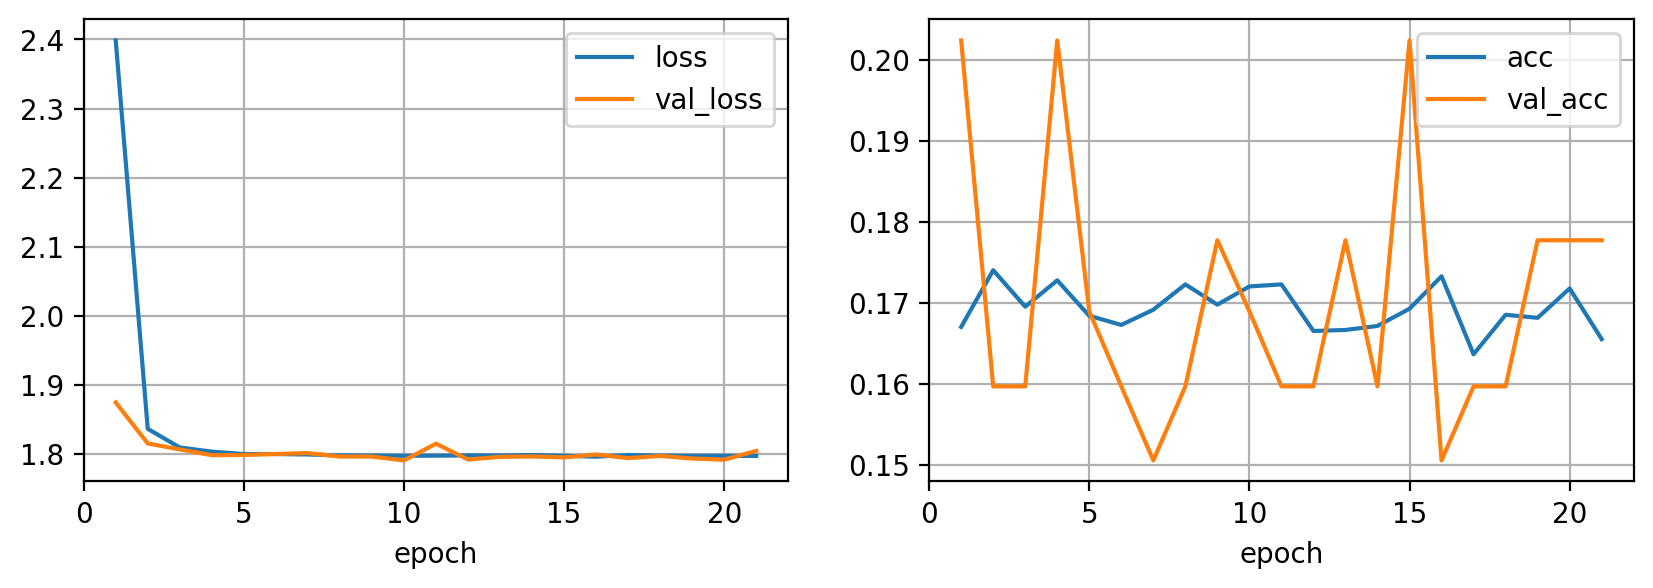

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()

# **APLICANDO CONCEPTOS DE OPTIMIZACION**

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().view(-1, 150*150*3)
        self.Y = torch.from_numpy(Y).long()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

dataset = {
    'train': Dataset(X_subset, y_subset),
    'val': Dataset(X_val, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=32, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(5000, 6034)

In [ ]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def build_model(D_in=150*150*3, H=100, D_out=6):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

def fit(model, dataloader, optimizer, epochs=100, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc = [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}

# Sin optimizador

In [ ]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
hist_sgd = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.09660 en epoch 1
Mejor modelo guardado con acc 0.10920 en epoch 6
Mejor modelo guardado con acc 0.11950 en epoch 8
Mejor modelo guardado con acc 0.12960 en epoch 9
Epoch 10/100 loss 2.66540 acc 0.14331 val_loss 2.66544 val_acc 0.12960
Mejor modelo guardado con acc 0.13610 en epoch 11
Mejor modelo guardado con acc 0.14670 en epoch 13
Mejor modelo guardado con acc 0.15080 en epoch 15
Mejor modelo guardado con acc 0.15440 en epoch 16
Mejor modelo guardado con acc 0.15790 en epoch 18
Mejor modelo guardado con acc 0.16430 en epoch 19
Mejor modelo guardado con acc 0.16520 en epoch 20
Epoch 20/100 loss 2.60760 acc 0.18073 val_loss 2.61299 val_acc 0.16520
Mejor modelo guardado con acc 0.17010 en epoch 21
Mejor modelo guardado con acc 0.18090 en epoch 22
Mejor modelo guardado con acc 0.18120 en epoch 25
Mejor modelo guardado con acc 0.18310 en epoch 27
Mejor modelo guardado con acc 0.18740 en epoch 28
Epoch 30/100 loss 2.54574 acc 0.19885 val_loss 2.56377 val_acc

# Momentum

In [ ]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
hist_momentum = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.11020 en epoch 1
Mejor modelo guardado con acc 0.13970 en epoch 2
Mejor modelo guardado con acc 0.15540 en epoch 3
Mejor modelo guardado con acc 0.18140 en epoch 4
Mejor modelo guardado con acc 0.18840 en epoch 5
Mejor modelo guardado con acc 0.19830 en epoch 6
Mejor modelo guardado con acc 0.20740 en epoch 8
Epoch 10/100 loss 2.37869 acc 0.23169 val_loss 2.42270 val_acc 0.20600
Mejor modelo guardado con acc 0.22380 en epoch 11
Mejor modelo guardado con acc 0.23160 en epoch 13
Mejor modelo guardado con acc 0.25120 en epoch 16
Epoch 20/100 loss 2.19007 acc 0.30553 val_loss 2.34818 val_acc 0.24410
Mejor modelo guardado con acc 0.25190 en epoch 21
Mejor modelo guardado con acc 0.25960 en epoch 22
Mejor modelo guardado con acc 0.26490 en epoch 25
Mejor modelo guardado con acc 0.27140 en epoch 27
Epoch 30/100 loss 1.98737 acc 0.37500 val_loss 2.34048 val_acc 0.25540
Mejor modelo guardado con acc 0.27910 en epoch 31
Mejor modelo guardado con acc 0.28350 en epo

# RMSProp

In [ ]:
model = build_model()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
hist_rms = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.09010 en epoch 1
Mejor modelo guardado con acc 0.11100 en epoch 2
Mejor modelo guardado con acc 0.13190 en epoch 3
Mejor modelo guardado con acc 0.16670 en epoch 4
Mejor modelo guardado con acc 0.17150 en epoch 5
Mejor modelo guardado con acc 0.18290 en epoch 6
Mejor modelo guardado con acc 0.20340 en epoch 9
Mejor modelo guardado con acc 0.22250 en epoch 10
Epoch 10/100 loss 2.29576 acc 0.26135 val_loss 2.40227 val_acc 0.22250
Mejor modelo guardado con acc 0.23520 en epoch 16
Epoch 20/100 loss 2.11128 acc 0.31409 val_loss 2.60623 val_acc 0.19260
Mejor modelo guardado con acc 0.25380 en epoch 22
Mejor modelo guardado con acc 0.25690 en epoch 28
Epoch 30/100 loss 1.97667 acc 0.35928 val_loss 2.46193 val_acc 0.24290
Mejor modelo guardado con acc 0.26050 en epoch 36
Epoch 40/100 loss 1.84840 acc 0.39889 val_loss 2.49463 val_acc 0.24860
Entrenamiento detenido en epoch 46 por no mejorar en 10 epochs seguidas


# Adam

In [ ]:
model = build_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
hist_adam = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.15180 en epoch 1
Mejor modelo guardado con acc 0.18170 en epoch 2
Mejor modelo guardado con acc 0.20710 en epoch 4
Mejor modelo guardado con acc 0.20790 en epoch 5
Mejor modelo guardado con acc 0.22650 en epoch 6
Mejor modelo guardado con acc 0.23660 en epoch 10
Epoch 10/100 loss 2.22174 acc 0.28045 val_loss 2.36293 val_acc 0.23660
Mejor modelo guardado con acc 0.24380 en epoch 12
Mejor modelo guardado con acc 0.25130 en epoch 14
Mejor modelo guardado con acc 0.25800 en epoch 15
Mejor modelo guardado con acc 0.26160 en epoch 18
Epoch 20/100 loss 2.01247 acc 0.34952 val_loss 2.43808 val_acc 0.24520
Mejor modelo guardado con acc 0.26640 en epoch 26
Mejor modelo guardado con acc 0.26860 en epoch 28
Epoch 30/100 loss 1.80690 acc 0.41063 val_loss 2.45265 val_acc 0.26420
Mejor modelo guardado con acc 0.26930 en epoch 32
Mejor modelo guardado con acc 0.27270 en epoch 33
Epoch 40/100 loss 1.65329 acc 0.46338 val_loss 2.52473 val_acc 0.26670
Entrenamiento detenid

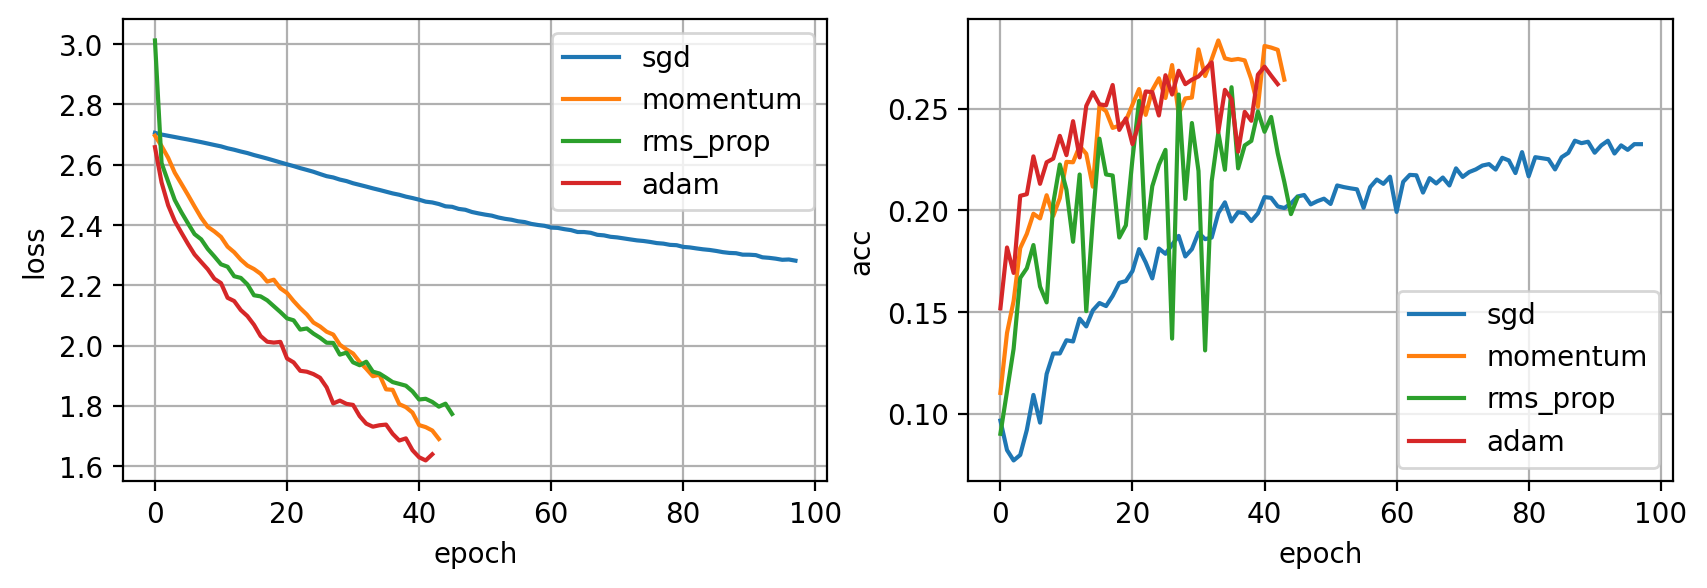

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_sgd['loss'], label="sgd")
ax.plot(hist_momentum['loss'], label="momentum")
ax.plot(hist_rms['loss'], label="rms_prop")
ax.plot(hist_adam['loss'], label="adam")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
ax.plot(hist_sgd['val_acc'], label="sgd")
ax.plot(hist_momentum['val_acc'], label="momentum")
ax.plot(hist_rms['val_acc'], label="rms_prop")
ax.plot(hist_adam['val_acc'], label="adam")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# Learning_rate_scheduling

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=100, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        if scheduler:
            scheduler.step()
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

# StepLR

In [ ]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# multiplica el lr por 0.1 cada 10 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, 0.1)

hist_step = fit(model, dataloader, optimizer, scheduler, epochs=30, early_stopping=10)

Mejor modelo guardado con acc 0.09110 en epoch 1
Mejor modelo guardado con acc 0.12870 en epoch 2
Mejor modelo guardado con acc 0.15470 en epoch 3
Mejor modelo guardado con acc 0.18130 en epoch 4
Mejor modelo guardado con acc 0.18590 en epoch 5
Mejor modelo guardado con acc 0.19570 en epoch 6
Mejor modelo guardado con acc 0.20240 en epoch 7
Mejor modelo guardado con acc 0.21650 en epoch 8
Epoch 10/30 loss 2.35756 acc 0.23945 val_loss 2.41994 val_acc 0.21070 lr 0.00100
Mejor modelo guardado con acc 0.22590 en epoch 11
Mejor modelo guardado con acc 0.22730 en epoch 12
Mejor modelo guardado con acc 0.23000 en epoch 13
Mejor modelo guardado con acc 0.23250 en epoch 15
Epoch 20/30 loss 2.28702 acc 0.27468 val_loss 2.38543 val_acc 0.23130 lr 0.00010
Entrenamiento detenido en epoch 25 por no mejorar en 10 epochs seguidas


# CyclicLR

In [ ]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# aumenta el lr por 5 epochs, luego decrece
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.01, step_size_up=5, step_size_down=25)

hist_cycle = fit(model, dataloader, optimizer, scheduler, epochs=30, early_stopping=10)

Mejor modelo guardado con acc 0.08550 en epoch 1
Mejor modelo guardado con acc 0.12360 en epoch 2
Mejor modelo guardado con acc 0.13430 en epoch 3
Mejor modelo guardado con acc 0.18150 en epoch 4
Mejor modelo guardado con acc 0.21220 en epoch 5
Mejor modelo guardado con acc 0.21650 en epoch 9
Mejor modelo guardado con acc 0.24170 en epoch 10
Epoch 10/30 loss 2.27232 acc 0.26771 val_loss 2.36499 val_acc 0.24170 lr 0.00842
Mejor modelo guardado con acc 0.24990 en epoch 13
Mejor modelo guardado con acc 0.25600 en epoch 14
Mejor modelo guardado con acc 0.26350 en epoch 17
Mejor modelo guardado con acc 0.26490 en epoch 19
Mejor modelo guardado con acc 0.27130 en epoch 20
Epoch 20/30 loss 1.92894 acc 0.38396 val_loss 2.36339 val_acc 0.27130 lr 0.00446
Mejor modelo guardado con acc 0.27300 en epoch 21
Mejor modelo guardado con acc 0.28020 en epoch 23
Mejor modelo guardado con acc 0.29160 en epoch 25
Mejor modelo guardado con acc 0.29510 en epoch 30
Epoch 30/30 loss 1.45059 acc 0.55195 val_los

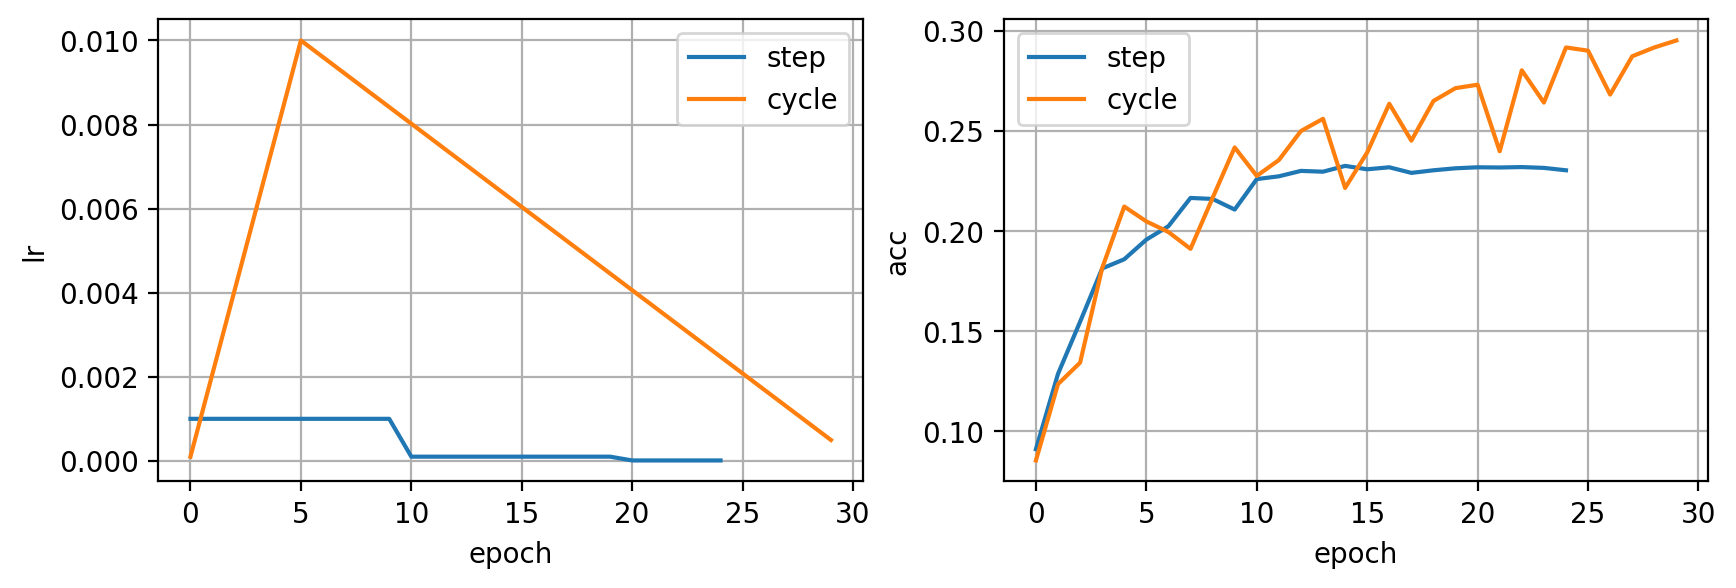

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_step['lr'], label="step")
ax.plot(hist_cycle['lr'], label="cycle")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('lr')
ax = plt.subplot(122)
ax.plot(hist_step['val_acc'], label="step")
ax.plot(hist_cycle['val_acc'], label="cycle")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# Normalizacion

In [ ]:
import numpy as np

mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.52439813, 0.50905477, 0.43398166]),
 array([0.27549254, 0.26727727, 0.28476294]))

In [ ]:
train_images_norm = ((train_images / 255) - mean) / std
train_images_norm.mean(axis=(0, 1, 2)), train_images_norm.std(axis=(0, 1, 2))

(array([ 1.38674827e-12, -9.77638801e-12, -5.42210979e-11]),
 array([1., 1., 1.]))

In [ ]:
X_test_norm = np.array([(np.array(img)/255. - mean) / std for img, label in testset])

X_train_norm, X_val_norm, X_subset_norm = train_images_norm[:8000], train_images_norm[8000:], train_images_norm[:5000]

X_train_norm.shape, X_val_norm.shape, X_test_norm.shape, X_subset_norm.shape

((20000, 50, 50, 3), (10000, 50, 50, 3), (2407, 50, 50, 3), (5000, 50, 50, 3))

In [ ]:
dataset_norm = {
    'train': Dataset(X_subset_norm, y_subset),
    'val': Dataset(X_val_norm, y_val),
}

dataloader_norm = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset_norm['train']), len(dataset_norm['val'])

(5000, 10000)

In [ ]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
hist_norm = fit(model, dataloader_norm, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.07990 en epoch 1
Mejor modelo guardado con acc 0.13440 en epoch 2
Mejor modelo guardado con acc 0.15620 en epoch 3
Mejor modelo guardado con acc 0.17230 en epoch 4
Mejor modelo guardado con acc 0.17340 en epoch 5
Mejor modelo guardado con acc 0.19370 en epoch 6
Mejor modelo guardado con acc 0.20060 en epoch 7
Mejor modelo guardado con acc 0.20910 en epoch 8
Mejor modelo guardado con acc 0.21000 en epoch 10
Epoch 10/100 loss 2.38040 acc 0.22751 val_loss 2.42818 val_acc 0.21000 lr 0.00100
Mejor modelo guardado con acc 0.22010 en epoch 11
Mejor modelo guardado con acc 0.22800 en epoch 12
Mejor modelo guardado con acc 0.23690 en epoch 14
Mejor modelo guardado con acc 0.23980 en epoch 16
Mejor modelo guardado con acc 0.24460 en epoch 17
Mejor modelo guardado con acc 0.24950 en epoch 18
Mejor modelo guardado con acc 0.25360 en epoch 19
Mejor modelo guardado con acc 0.25920 en epoch 20
Epoch 20/100 loss 2.19782 acc 0.30195 val_loss 2.33565 val_acc 0.25920 lr 0.

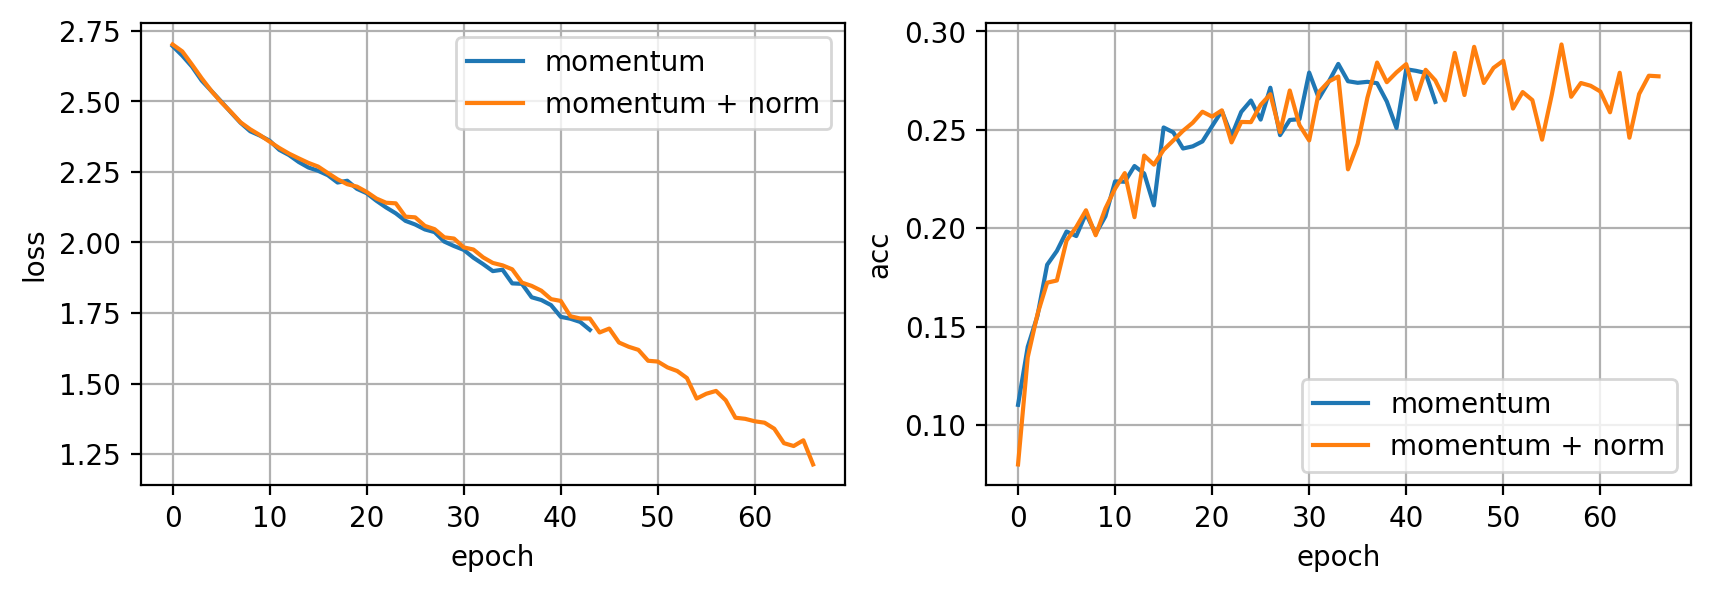

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_momentum['loss'], label="momentum")
ax.plot(hist_norm['loss'], label="momentum + norm")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
ax.plot(hist_momentum['val_acc'], label="momentum")
ax.plot(hist_norm['val_acc'], label="momentum + norm")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# Batch_normalization

In [ ]:
def build_model(D_in=150*150*3, H=100, D_out=6):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
    )

In [ ]:
model = build_model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
hist_bn = fit(model, dataloader, optimizer, early_stopping=10)

Mejor modelo guardado con acc 0.21250 en epoch 1
Mejor modelo guardado con acc 0.24130 en epoch 2
Epoch 10/100 loss 1.48412 acc 0.57285 val_loss 2.68424 val_acc 0.20150 lr 0.00100
Entrenamiento detenido en epoch 12 por no mejorar en 10 epochs seguidas


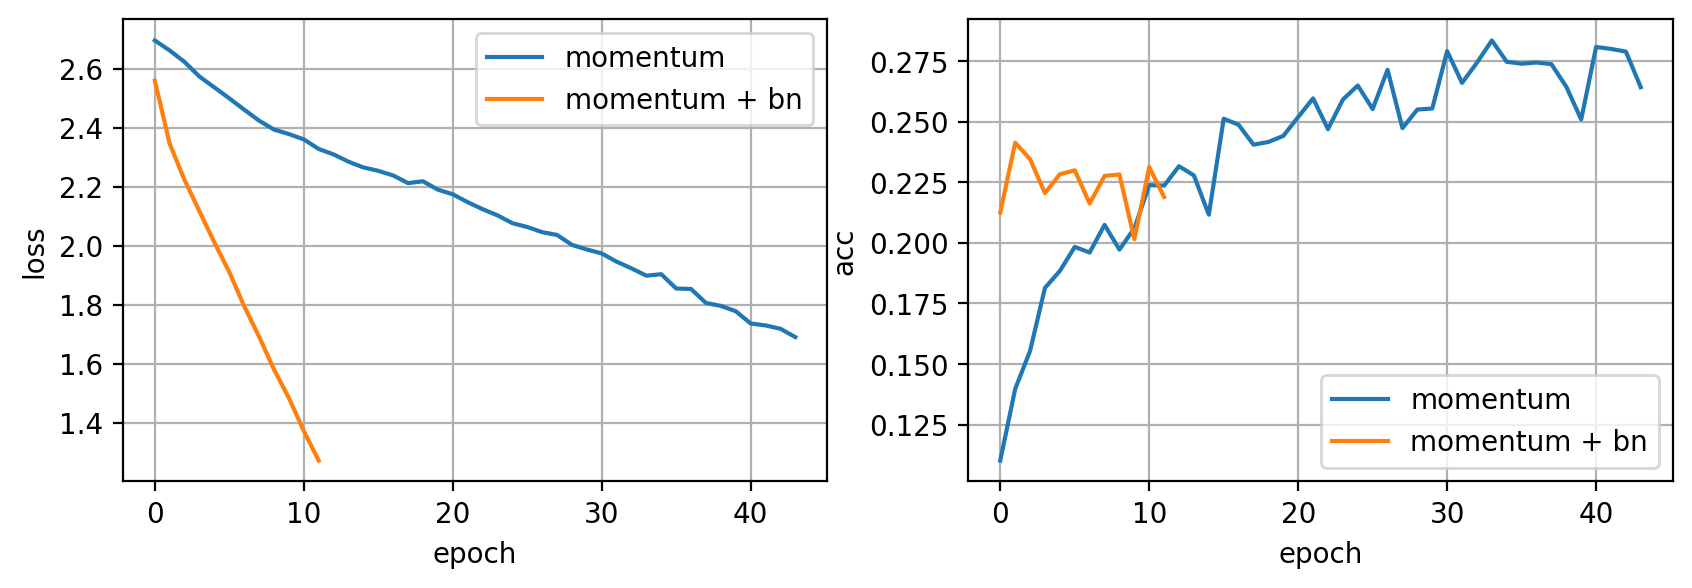

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
ax.plot(hist_momentum['loss'], label="momentum")
ax.plot(hist_bn['loss'], label="momentum + bn")
ax.legend()
ax.grid(True)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax = plt.subplot(122)
ax.plot(hist_momentum['val_acc'], label="momentum")
ax.plot(hist_bn['val_acc'], label="momentum + bn")
ax.legend()
ax.grid(True)
ax.set_ylabel('acc')
ax.set_xlabel('epoch')
plt.show()

# **MLP FINAL APLICANDO LOS MEJORES REGULADORES Y OPTIMIZADORES**

In [ ]:
mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.43017188, 0.45747465, 0.45384537]),
 array([0.26938181, 0.26790744, 0.29831735]))

In [ ]:
train_images_norm = ((train_images / 255) - mean) / std
train_images_norm.mean(axis=(0, 1, 2)), train_images_norm.std(axis=(0, 1, 2))

(array([1.18072429e-10, 1.22722902e-10, 1.51032366e-10]), array([1., 1., 1.]))

In [ ]:
X_test_norm = np.array([(np.array(img)/255. - mean) / std for img, label in testset])

X_train_norm, X_val_norm, X_subset_norm = train_images_norm[:8000], train_images_norm[8000:], train_images_norm[:5000]

X_train_norm.shape, X_val_norm.shape, X_test_norm.shape, X_subset_norm.shape

((8000, 150, 150, 3),
 (6034, 150, 150, 3),
 (3000, 150, 150, 3),
 (5000, 150, 150, 3))

In [ ]:
from albumentations import Compose, RandomCrop, Resize, HorizontalFlip, ToGray, RGBShift, OneOf

trans = Compose([
    RandomCrop(24,24),
    Resize(150, 150),
    HorizontalFlip(),
    OneOf([
        RGBShift(p=0.3)
    ])
])


class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, trans=None):
        self.X = X
        self.Y = Y
        self.trans = trans
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        img = self.X[ix]
        if self.trans:
            img = trans(image=img)["image"]
        img = torch.from_numpy(img / 255.).float().view(-1)
        label = torch.tensor(self.Y[ix]).long()
        return img, label


dataset = {
    'train': Dataset(X_train_norm, y_train, trans=trans),
    'val': Dataset(X_val_norm, y_val),
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=1000, shuffle=False)
}

len(dataset['train']), len(dataset['val'])

(8000, 6034)

In [ ]:
from sklearn.metrics import accuracy_score

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def build_model(D_in=150*150*3, H=100, D_out=6, p=0):
    return torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, H),
        torch.nn.BatchNorm1d(H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p),
        torch.nn.Linear(H, D_out)
    )

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=0, log_each=10, weight_decay=0, early_stopping=0):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0
    for e in range(1, epochs+1):
        _l, _acc = [], []
        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])
        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))
        l.append(np.mean(_l))
        acc.append(np.mean(_acc))
        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))
        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))
        # guardar mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), 'ckpt.pt')
            step = 0
            print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")
        step += 1
        if scheduler:
            scheduler.step()
        # parar
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break
        if not e % log_each:
            print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f} val_loss {val_l[-1]:.5f} val_acc {val_acc[-1]:.5f} lr {lr[-1]:.5f}")
    # cargar mejor modelo
    model.load_state_dict(torch.load('ckpt.pt'))
    return {'epoch': list(range(1, len(l)+1)), 'loss': l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc, 'lr': lr}

In [ ]:
model = build_model(p=0.5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.8)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0005, max_lr=0.005, step_size_up=5, step_size_down=25)
hist = fit(model, dataloader, optimizer, scheduler, epochs=1000, weight_decay=0.01, early_stopping=30)

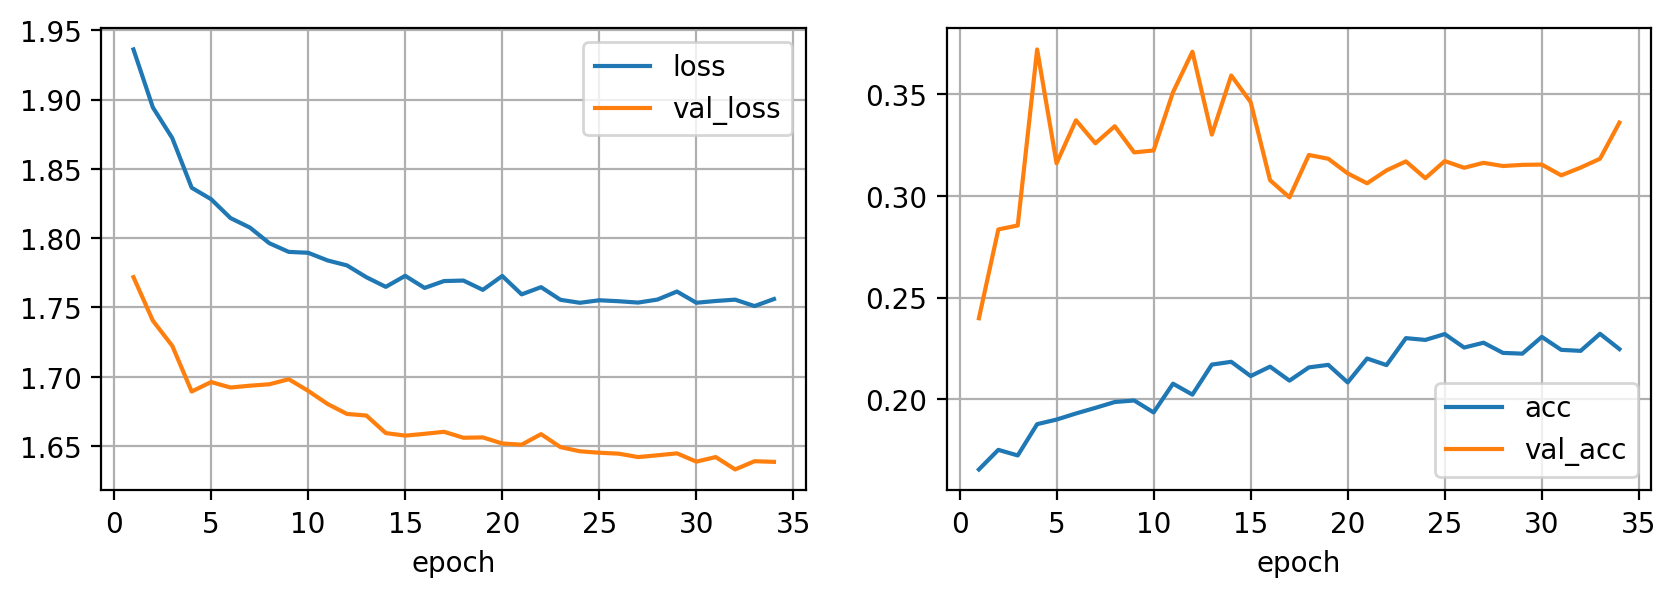

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
pd.DataFrame(hist).plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()